<a href="https://colab.research.google.com/github/LearningBoy2002/Sentiment-Analysis/blob/main/DS2EDAandPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [4]:
file_path = "youtube_comments_cleaned.csv"
data = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,  # Load as Pandas DataFrame
    "amaanpoonawala/youtube-comments-sentiment-dataset",  # Kaggle dataset name
    file_path,
)
data.sample(5)

<ipython-input-4-524d345abf14>:2: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  data = kagglehub.load_dataset(


,CommentID,VideoID,VideoTitle,AuthorName,AuthorChannelID,CommentText,Sentiment,Likes,Replies,PublishedAt,CountryCode,CategoryID
691980,Ugz0wm3Wf2S9Ns2t5c14AaABAg,0-VX8O-yWKU,Putin orders Russian troops into Ukraine separ...,@Buugzy,UCi4GRhHkJVVLncPYCRRJ0-Q,End of Tiemz,Neutral,0,0,2022-02-24 11:48:26,DE,25
556875,UgxWElhYIjVXwdPd7a14AaABAg,ZHVKYzCRkPE,Lithuania reinforces troops along Kaliningrad ...,@kevinmccabe7263,UCSVMotXIHw1X0BBszmCN4lA,Russia has reminded everyone why NATO exists i...,Positive,13,1,2022-04-02 19:35:48,DE,25
367537,UgwmHPjHqRf00iB2FuN4AaABAg,R7vmHGAshi8,How to travel the world with almost no money |...,@divyaskumar634,UC9ApnNU6MYT4F1Wuy-EP59A,Can we all form a group from around the world ...,Neutral,2116,372,2020-12-03 08:23:59,US,25
29339,Ugyyk0Co-MMTb6Kw71l4AaABAg,obqXDR7kgUk,Lambo driver shows how to get out of a ticket ...,@zaccbruv3693,UCgqoOYSS1HtLNGkX6ldptoQ,His whole demeanour changed once he found out ...,Positive,0,0,2025-01-11 07:01:57,GB,2
129371,Ugz66IQXyAspzXzFVZd4AaABAg,pn6zEB6rzDw,"""One of the Most Selfish Acts in Canadian Hist...",@user-ko6tk9qf8k,UCQ3Vg7Gbhsdk0VsKoYXfN8Q,Get rid of the carbon tax? Why not take it a...,Negative,6,3,2025-01-09 21:51:31,CA,25


In [7]:
df = data[['CommentText', 'Sentiment']]
sentiment_mapping = {"Positive": 1, "Negative": -1, "Neutral": 0}
df["Sentiment"] = df["Sentiment"].replace(sentiment_mapping)
df = df.rename(columns={"CommentText": "clean_comment", "Sentiment": "category"})

<ipython-input-7-1a8657985056>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Sentiment"] = df["Sentiment"].replace(sentiment_mapping)
<ipython-input-7-1a8657985056>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sentiment"] = df["Sentiment"].replace(sentiment_mapping)


In [10]:
df.sample(5)

,clean_comment,category
734969,bomboclat,-1
653346,"Really appreciate your honesty, this was great...",1
798888,A tutorial on how to wreck your car.,-1
816129,I can understand why the guys walked off on th...,-1
144295,So where is the comment by GLOBAL to say if th...,0


In [11]:
df.shape

(1032225, 2)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032225 entries, 0 to 1032224
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   clean_comment  1032225 non-null  object
 1   category       1032225 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ MB


In [13]:
df.isnull().sum()

,0
clean_comment,0
category,0


In [14]:
df.duplicated().sum()

40484

In [15]:
df[df.duplicated()]

,clean_comment,category
601,Nice,1
662,awesome,1
1645,thanks,1
1796,❤,1
1797,❤,1
...,...,...
1032115,Thanks!,1
1032137,Masha Allah ❤,1
1032174,✅,1
1032176,What the f***,-1


In [16]:
df.drop_duplicates(inplace=True)

In [19]:
df[(df['clean_comment'].str.strip() == '')]

,clean_comment,category


In [18]:
df = df[df['clean_comment'].str.strip() != ''] #removing rows that are just spaces

In [20]:
df['clean_comment'] = df['clean_comment'].str.lower()
df.head()

,clean_comment,category
0,anyone know what movie this is?,0
1,the fact they're holding each other back while...,1
2,waiting next video will be?,0
3,thanks for the great video.\n\ni don't underst...,0
4,good person helping good people.\nthis is how ...,1


In [21]:
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,clean_comment,category
1054,ayo 1:02,0
2266,"""one of the most difficult places to reach wi...",-1
4000,finally 4k video,0
4087,i genuinely feel sorry for george,-1
5175,china has entered the comment section,0
...,...,...
1013012,that was an incredible comeback. that was a gr...,1
1016686,the dye got to his pea brain.,-1
1018739,they used frog dna to fill in the missing gaps...,0
1021856,"""on the planet...maaaarrsss"" 😂😂",0


In [22]:
# Remove trailing and leading whitespaces from the 'clean_comment' column
df['clean_comment'] = df['clean_comment'].str.strip()

# Verify the transformation by checking for any remaining trailing whitespaces
df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum()

0

In [23]:
# Identify comments containing URLs
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls = df[df['clean_comment'].str.contains(url_pattern, regex=True)]

# Display the comments containing URLs
comments_with_urls.head()


,clean_comment,category
1360,https://www.youtube.com/watch?v=agtcdcgmnga li...,0
2619,https://panacea99.com/blogs/news/9-shocking-th...,0
4027,faustina kowalska and more: https...,0
8084,https://youtu.be/nfngc_8rivc ukraine crisis no...,0
8479,https://youtu.be/iz13vfxezlk,0


In [24]:
df = df[~df['clean_comment'].str.contains(url_pattern, regex=True)]

In [33]:
# Identify comments containing new line characters
comments_with_newline = df[df['clean_comment'].str.contains('\n')]

# Display the comments containing new line characters
comments_with_newline.head()

,clean_comment,category


In [31]:
df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ', regex=True)

<Axes: xlabel='category', ylabel='count'>

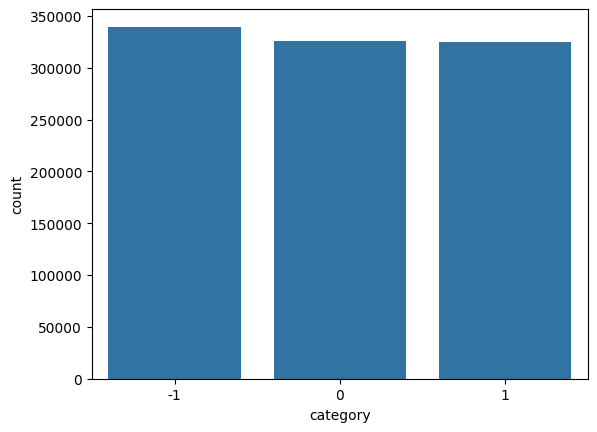

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
# distribution of classes

sns.countplot(data=df,x="category")

Almost all the three category has the same distribution

In [35]:
df['category'].value_counts(normalize=True).mul(100).round(2)

,proportion
category,
-1,34.29
0,32.92
1,32.79


In [36]:
df['word_count'] = df['clean_comment'].apply(lambda x: len(x.split()))

In [37]:
df['word_count'].describe()

,word_count
count,990344.000000
mean,19.801611
std,29.878389
min,1.000000
25%,7.000000
50%,12.000000
75%,23.000000
max,1796.000000


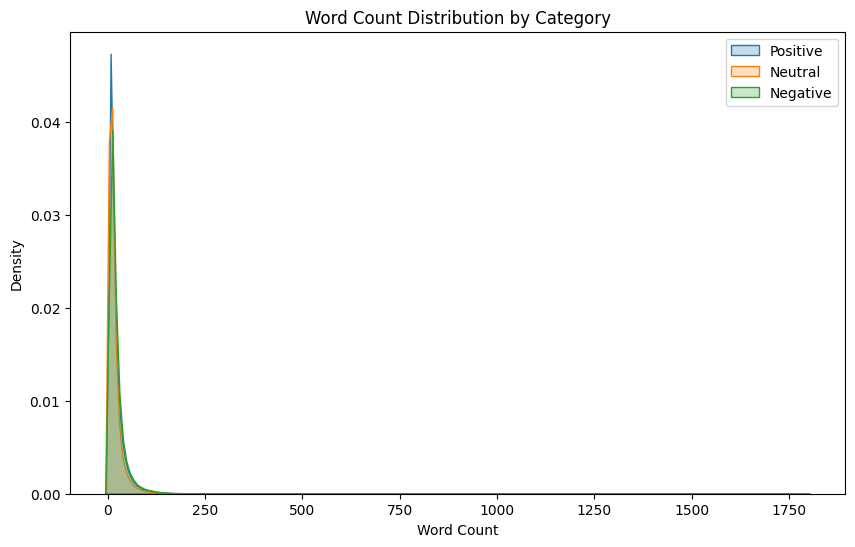

In [40]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df[df['category'] == 1]['word_count'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df[df['category'] == 0]['word_count'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df[df['category'] == -1]['word_count'], label='Negative', fill=True)

# Add title and labels
plt.title('Word Count Distribution by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

Almost Same Distribution for all the 3 categories

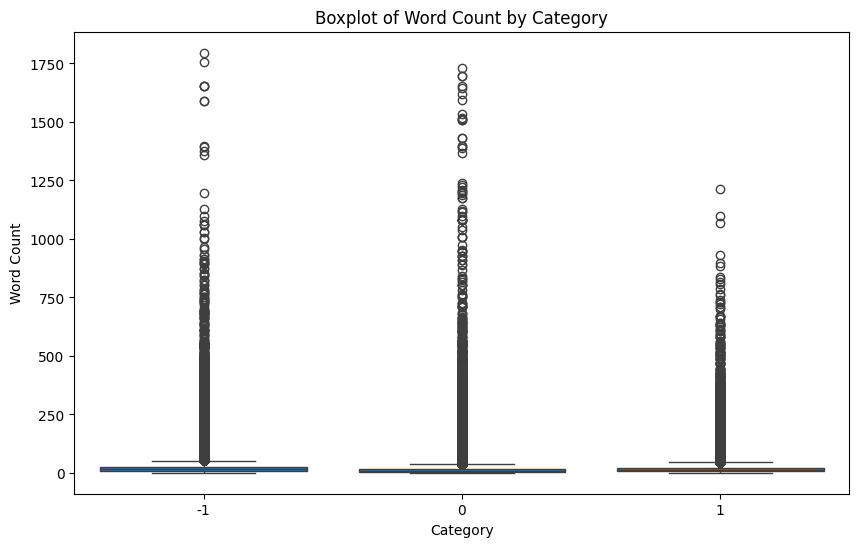

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='word_count')
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()